In [4]:
# First, import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
sns.set()

In [5]:
# load the data
songs = pd.read_csv('datasets/top50.csv')
print(songs.head())

   Rank                       Track.Name    Artist.Name           Genre  \
0     1                         Senorita   Shawn Mendes    canadian pop   
1     2                            China       Anuel AA  reggaeton flow   
2     3    boyfriend (with Social House)  Ariana Grande       dance pop   
3     4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4     5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76              -6         8        75   
1               105      81            79              -4         8        61   
2               190      80            40              -4        16        70   
3                93      65            64              -8         8        55   
4               150      65            58              -4        11        18   

   Length.  Acousticness..  Speechiness.  Popularity  
0      

We can clearly see that the columns' names are hard to read, therefore let's make it more readable

In [6]:
songs.columns = songs.columns.str.replace('\.|db|dB', ' ').str.strip()
songs.head()

,Rank,Track Name,Artist Name,Genre,Beats Per Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


Let's convert the data types and clean the genres


In [8]:
# print(songs.info())

genres = np.unique(songs.Genre)
print(genres)

song_types = songs.Genre
song_types.loc[song_types.str.contains('hip hop')] = 'hip hop'
song_types.loc[song_types.str.contains('pop')] = 'pop'
song_types.loc[song_types.str.contains('rap')] = 'rap'
song_types.loc[song_types.str.contains('reggaeton') | song_types.str.contains('latin')] = 'reggaeton'
song_types.loc[song_types.str.contains('r&b') | song_types.str.contains('escape room')] = 'r&b'
songs.drop('Genre', axis=1, inplace=True)
songs['Genre'] = song_types.values


['big room' 'boy band' 'brostep' 'edm' 'hip hop' 'pop' 'r&b' 'rap'
 'reggaeton']


c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [10]:
genres = np.unique(songs.Genre)
print(genres)

X = songs.drop(['Rank', 'Track Name', 'Artist Name', 'Genre'], axis=1).values
y = songs['Genre'].values
y = LabelEncoder().fit_transform(y)


['big room' 'boy band' 'brostep' 'edm' 'hip hop' 'pop' 'r&b' 'rap'
 'reggaeton']


transform data


In [50]:
print(y)
X_transformed = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=42, test_size=0.3)

# check neighbors & find the best
neighbors = np.arange(1, 15)
train_results = []
test_results = []

for idx, neighbor in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=neighbor).fit(X_train, y_train)
    train_results.append(knn.score(X_train, y_train))
    test_results.append(knn.score(X_test, y_test))


[5 8 5 5 7 5 7 5 7 5 8 5 5 5 4 5 8 7 4 6 5 7 8 8 5 5 5 4 8 8 3 5 8 4 5 0 5
 5 1 5 3 5 5 5 6 2 8 2 3 5]


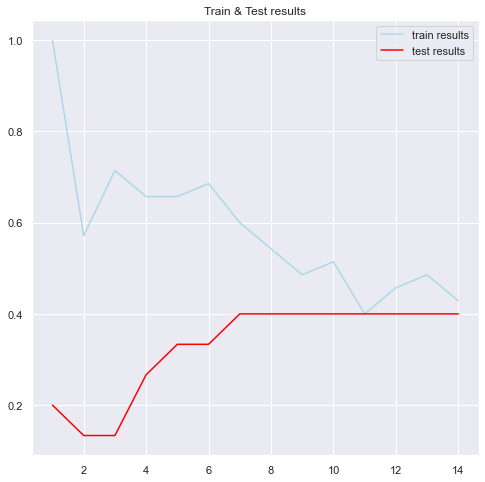

In [51]:
plt.figure(figsize=(8, 8))
plt.title('Train & Test results')
plt.plot(neighbors, train_results, label='train results', color='lightblue')
plt.plot(neighbors, test_results, label='test results', color='red')
plt.legend()
plt.show()


## Classification Report w/ 7 neighbors


In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 1 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 6 0 0 1]
 [0 0 0 1 0 0 0]
 [0 0 1 2 0 0 0]
 [0 0 0 1 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.46      0.86      0.60         7
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1

    accuracy                           0.40        15
   macro avg       0.07      0.12      0.09        15
weighted avg       0.22      0.40      0.28        15



c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# compare with RandomForest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(f'Score: {clf.score(X_test, y_test)}')
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

Score: 0.4
[[0 0 0 0 0 1]
 [0 0 2 0 0 0]
 [0 0 6 0 0 1]
 [0 0 1 0 0 0]
 [0 0 2 0 0 1]
 [0 0 1 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           5       0.50      0.86      0.63         7
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1

    accuracy                           0.40        15
   macro avg       0.08      0.14      0.11        15
weighted avg       0.23      0.40      0.29        15



c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# compare with LinearCVS
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=0, tol=1e-8).fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(f'Score: {svc.score(X_test, y_test)}')
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

Score: 0.4
[[0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 0 0 5 0 0 1]
 [0 0 0 0 0 0 1 0]
 [1 0 0 0 0 1 1 0]
 [0 0 0 0 1 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.62      0.71      0.67         7
           6       0.00      0.00      0.00         1
           7       0.50      0.33      0.40         3
           8       0.00      0.00      0.00         1

    accuracy                           0.40        15
   macro avg       0.14      0.13      0.13        15
weighted avg       0.39      0.40      0.39        15



c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
